# 데이터 분석 및 시각화

유튜브 메인페이지 탐색/인기 섹션에서 기초한 데이터셋


# Q1. 데이터 타입별 시각화 

- 전체기간 카테고리 > 채널 > 비디오 개수
- 월별 카테고리 > 채널 > 비디오 개수
- 월별 TOP10 채널 (분류기준은 비디오 개수) 
- 주별 TOP5 채널 (분류기준은 비디오 개수)
- 월별 카테고리별 태그 키워드 순위 

video_id: 영상의 비디오 아이디

channel_id : 영상이 업로드 되어있는 채널 아이디

pulished_date : 영상이 유뷰트에 업로드된 날짜

category_name : 영상/채널의 카테고리

duration : 영상 길이


tags : 해시태그


description : 부연설명

on_trending_date : 인기 동영상에서 처음 포착된 날짜

off_trending_date : 인기 동영상에서 사라진 날짜

on_rank : 인기 동영상에서 처음 기록된 순위

off_rank : 인기 동영상에서 사라지기전 기록된 순위

on_views : 인기 동영상에서 처음 기록된 조회수

off_views : 인기 동영상에서 사라지기전 기록된 조회수

on_likes : 인기 동영상에서 처음 기록된 좋아요수  

off_likes :  인기 동영상에서 사라지기전 기록된 좋아요수

on_dislikes : 인기 동영상에서 처음 기록된 싫어요수  

off_dislikes :  인기 동영상에서 사라지기전 기록된 싫어요수

on_comments : 인기 동영상에서 처음 기록된 댓글수 

off_comments : 인기 동영상에서 사라지기전 기록된 댓글수 

on_channel_subscribers : 인기 동영상에서 처음 기록된 채널의 구독자수 

off_channel_subscribers : 인기 동영상에서 사라지기전 기록된 채널의 구독자수

on_channel_total_views : 인기 동영상에서 처음 기록된 전체 비디오 조회수의 합

off_channel_total_views : 인기 동영상에서 사라지기전 기록된 전체 비디오 조회수의 합

on_channel_total_videos : 인기 동영상에서 처음 기록된 채널의 비디오 개수 

off_channel_total_videos : 인기 동영상에서 사라지기전 기록된 채널의 비디오 개수 


In [38]:
!python --version

Python 3.7.12


In [39]:
# 그래프 한글 폰트 설치
!apt-get install fonts-nanum*
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
The following pa

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm 


In [41]:
url = '/content/drive/MyDrive/Classroom/AI심화과정/pretest_data.csv'

df = pd.read_csv(url)

df.head()

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341
3,V-5ip,CHUQVGX,2021-06-02,Sports,PT6M40S,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,2021-06-04,2021-06-04,18,...,30,30,416,416,94200,94200,71160125,71160125,224,224
4,V-5jn,CHhI3EX,2021-07-06,Sports,PT11M27S,이천수|심판도전기|축구심판,찾아 뵐 심판분들이 이제 18명정도 남았네요,2021-07-08,2021-07-09,11,...,112,143,687,772,47600,49200,6993451,7607123,21,21


In [42]:
df.info()
# 2644 x 25의 데이터프레임  
# tags 와 description에 결측치 존재 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   video_id                  2644 non-null   object
 1   channel_id                2644 non-null   object
 2   published_date            2644 non-null   object
 3   category_name             2644 non-null   object
 4   duration                  2644 non-null   object
 5   tags                      2274 non-null   object
 6   description               2604 non-null   object
 7   on_trending_date          2644 non-null   object
 8   off_trending_date         2644 non-null   object
 9   on_rank                   2644 non-null   int64 
 10  off_rank                  2644 non-null   int64 
 11  on_views                  2644 non-null   int64 
 12  off_views                 2644 non-null   int64 
 13  on_likes                  2644 non-null   int64 
 14  off_likes               

In [43]:
# datetime 변경
df['published_date'] = pd.to_datetime(df['published_date'])
# month 컬럼 추가 
df['month'] = df['published_date'].dt.month

# 전체기간 카테고리 -> 채널 -> 비디오 개수

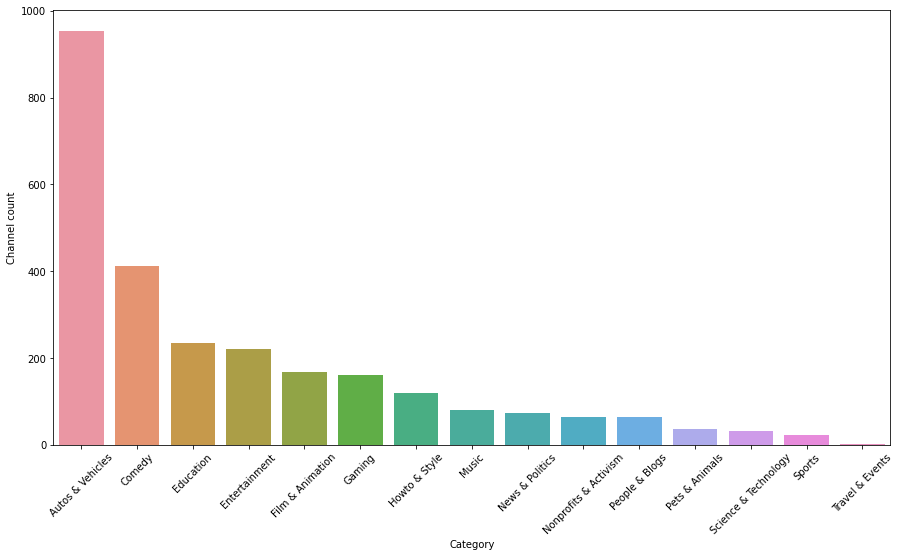

In [44]:
# 카테고리별 채널 개수 
fig = plt.figure(figsize=(15,8))
cat_labels = df.groupby('category_name')['channel_id'].count().index
sns.barplot(x= cat_labels, y=df.groupby('category_name')['channel_id'].count().sort_values(ascending=False))
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Channel count")
plt.show()

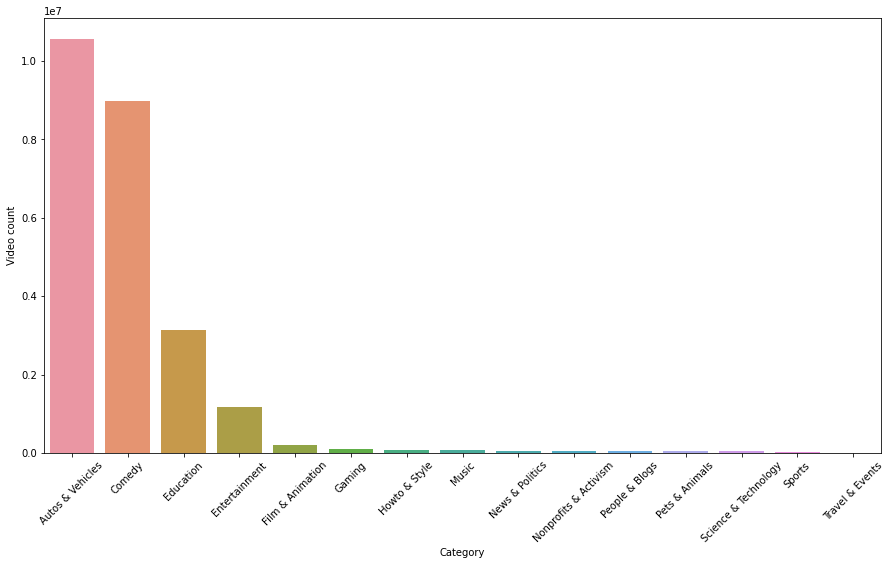

In [45]:
# 카테고리별 비디오 개수 
fig = plt.figure(figsize=(15,8))
sns.barplot(x=cat_labels, y=df.groupby('category_name')['on_channel_total_videos'].sum().sort_values(ascending=False))
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Video count")
plt.show()


In [46]:
# 카테고리별 > 채널별 > 비디오 개수 
df.groupby(["category_name","channel_id"])["on_channel_total_videos"].sum()

category_name     channel_id
Autos & Vehicles  CH-IBt8        1927
                  CH2xkO7         195
                  CH5f97D        1103
                  CHDpnvN         264
                  CHH5U89       22977
                                ...  
Travel & Events   CHPDdt9        1023
                  CHPll9Z         716
                  CHa0aTy         380
                  CHlRNDV        1261
                  CHsLoTw        2795
Name: on_channel_total_videos, Length: 970, dtype: int64

# 월별 카테고리 -> 채널 -> 비디오 개수

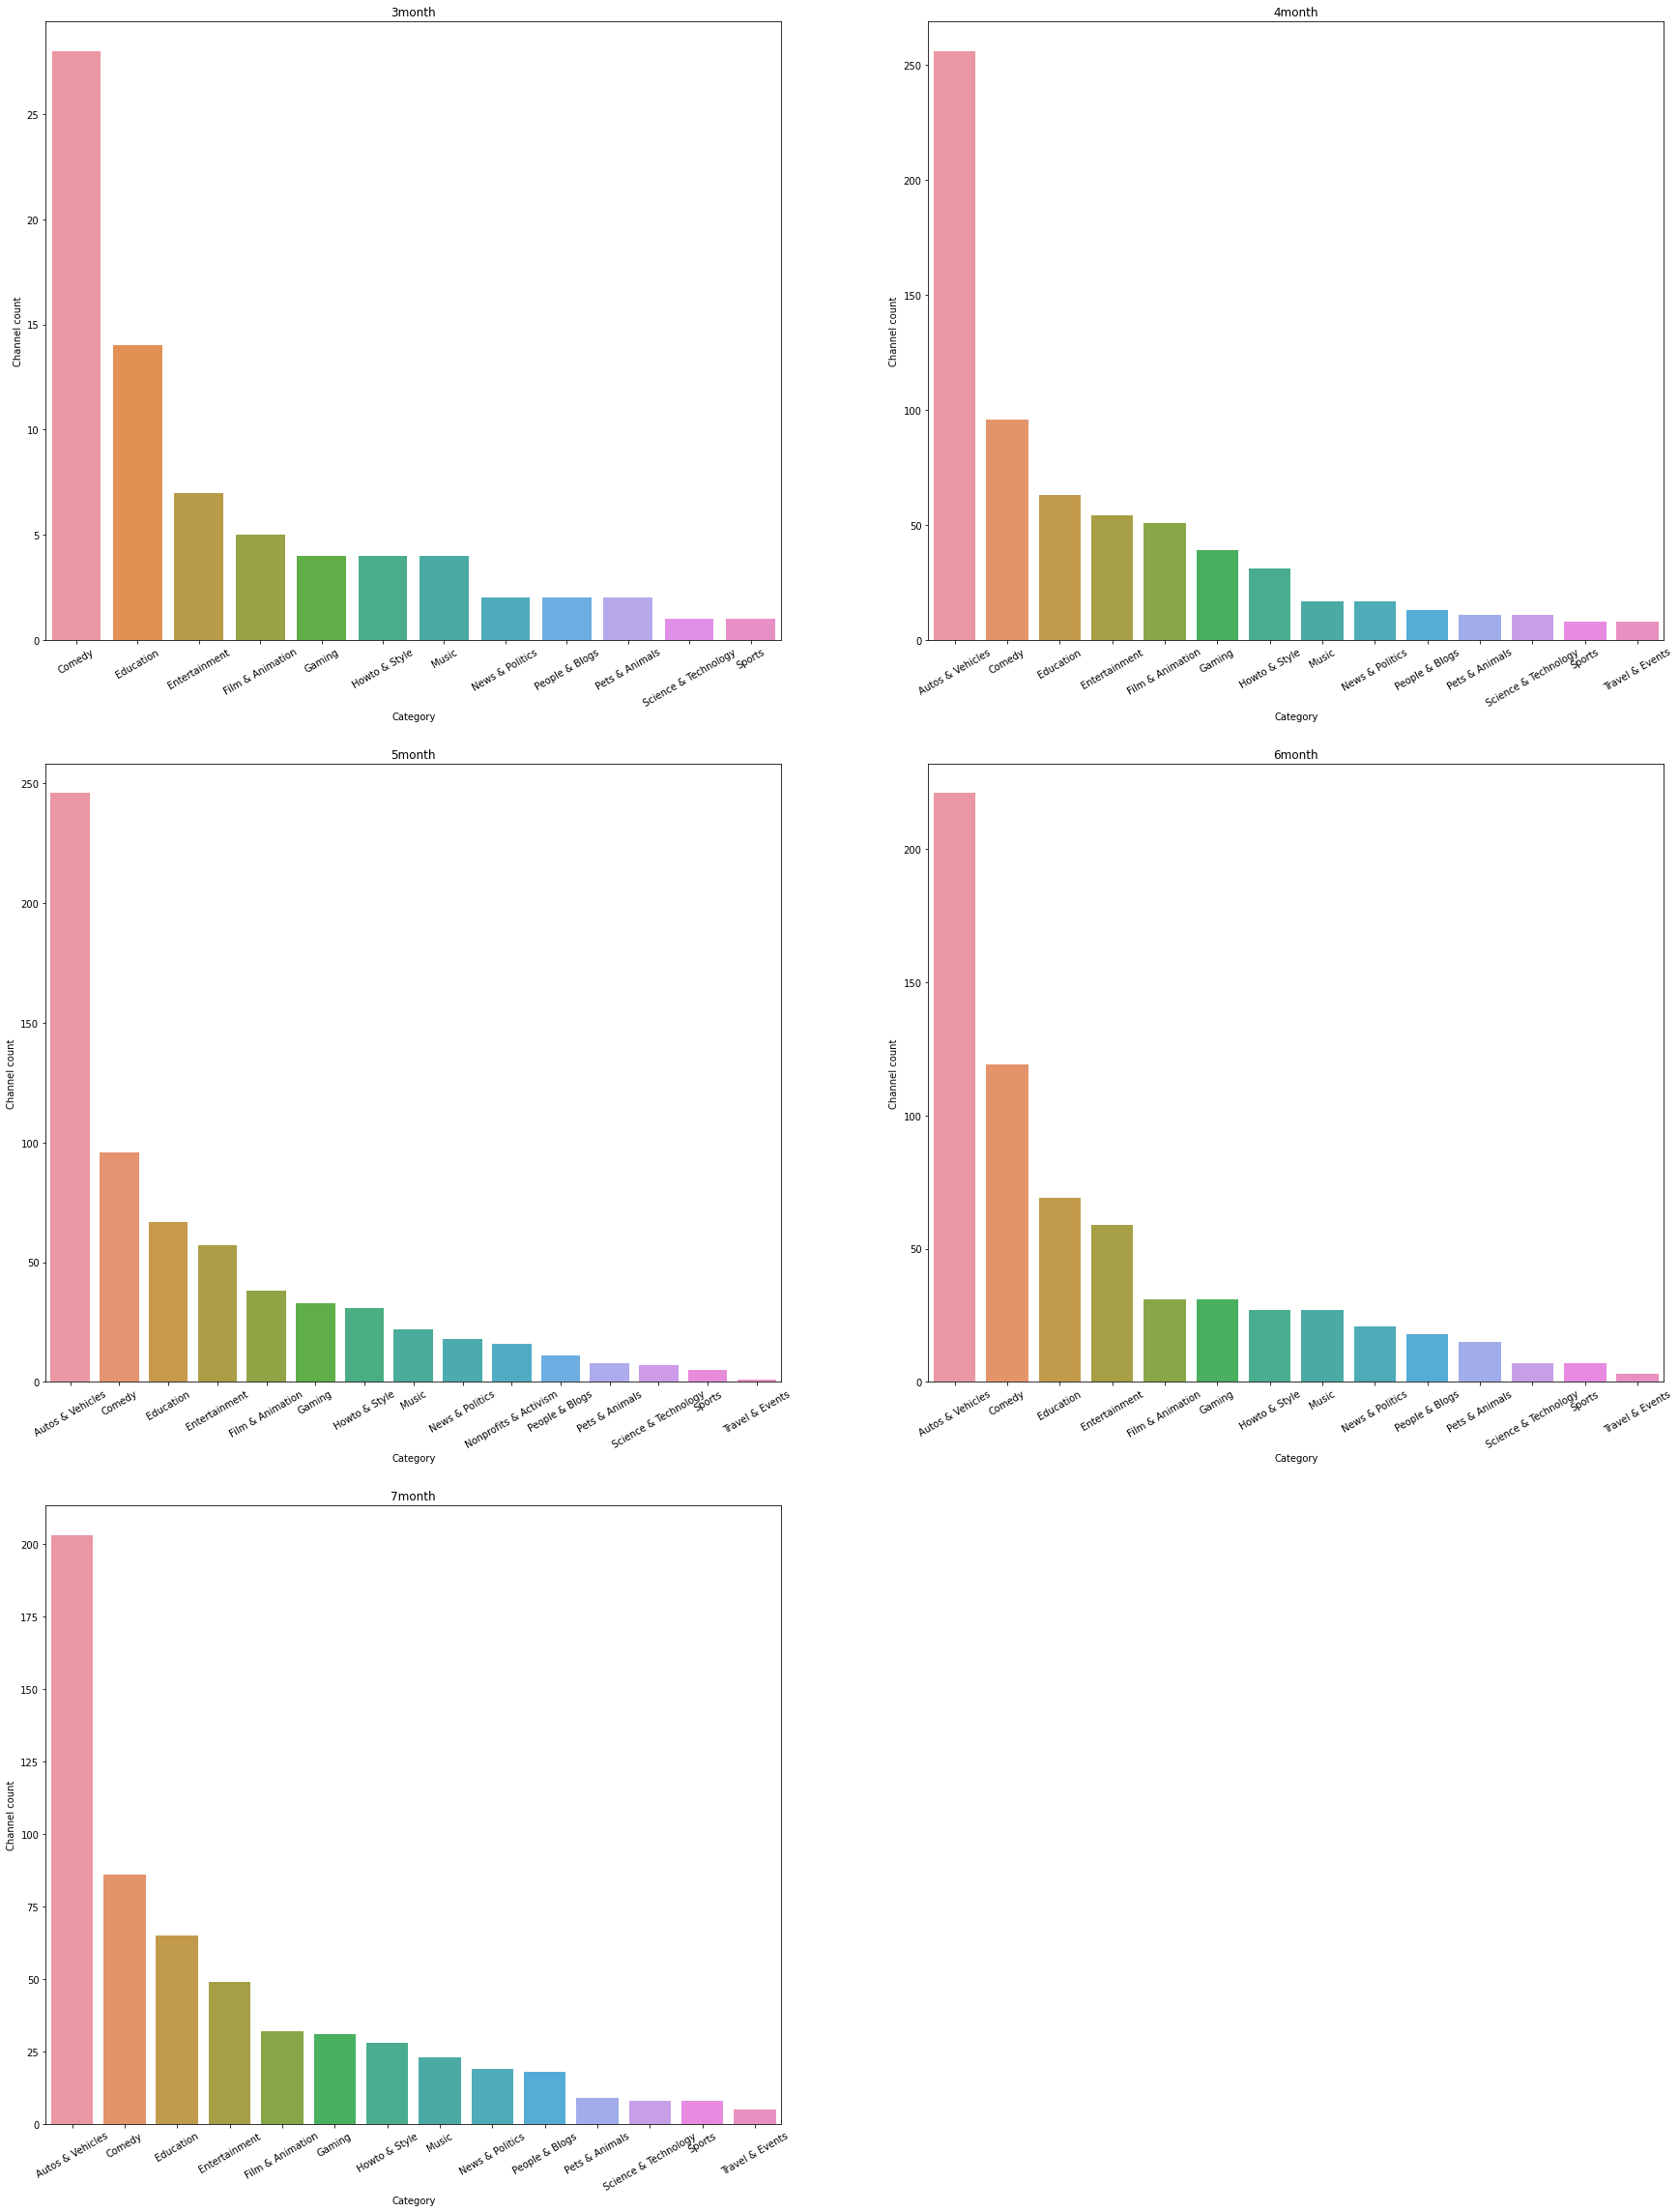

In [47]:
# 월별 카테고리 채널 개수 
fig = plt.figure(figsize=(30,40))

for i in range(1, 6):
    plt.subplot(3, 2, i) 
    sns.barplot(x=df[df['month']==i+2].groupby('category_name')['channel_id'].count().index, y=df[df['month']==i+2].groupby('category_name')['channel_id'].count().sort_values(ascending=False))
    plt.title(str(i+2)+"month")
    plt.xticks(rotation=30)
    plt.xlabel("Category")
    plt.ylabel("Channel count")

plt.show()

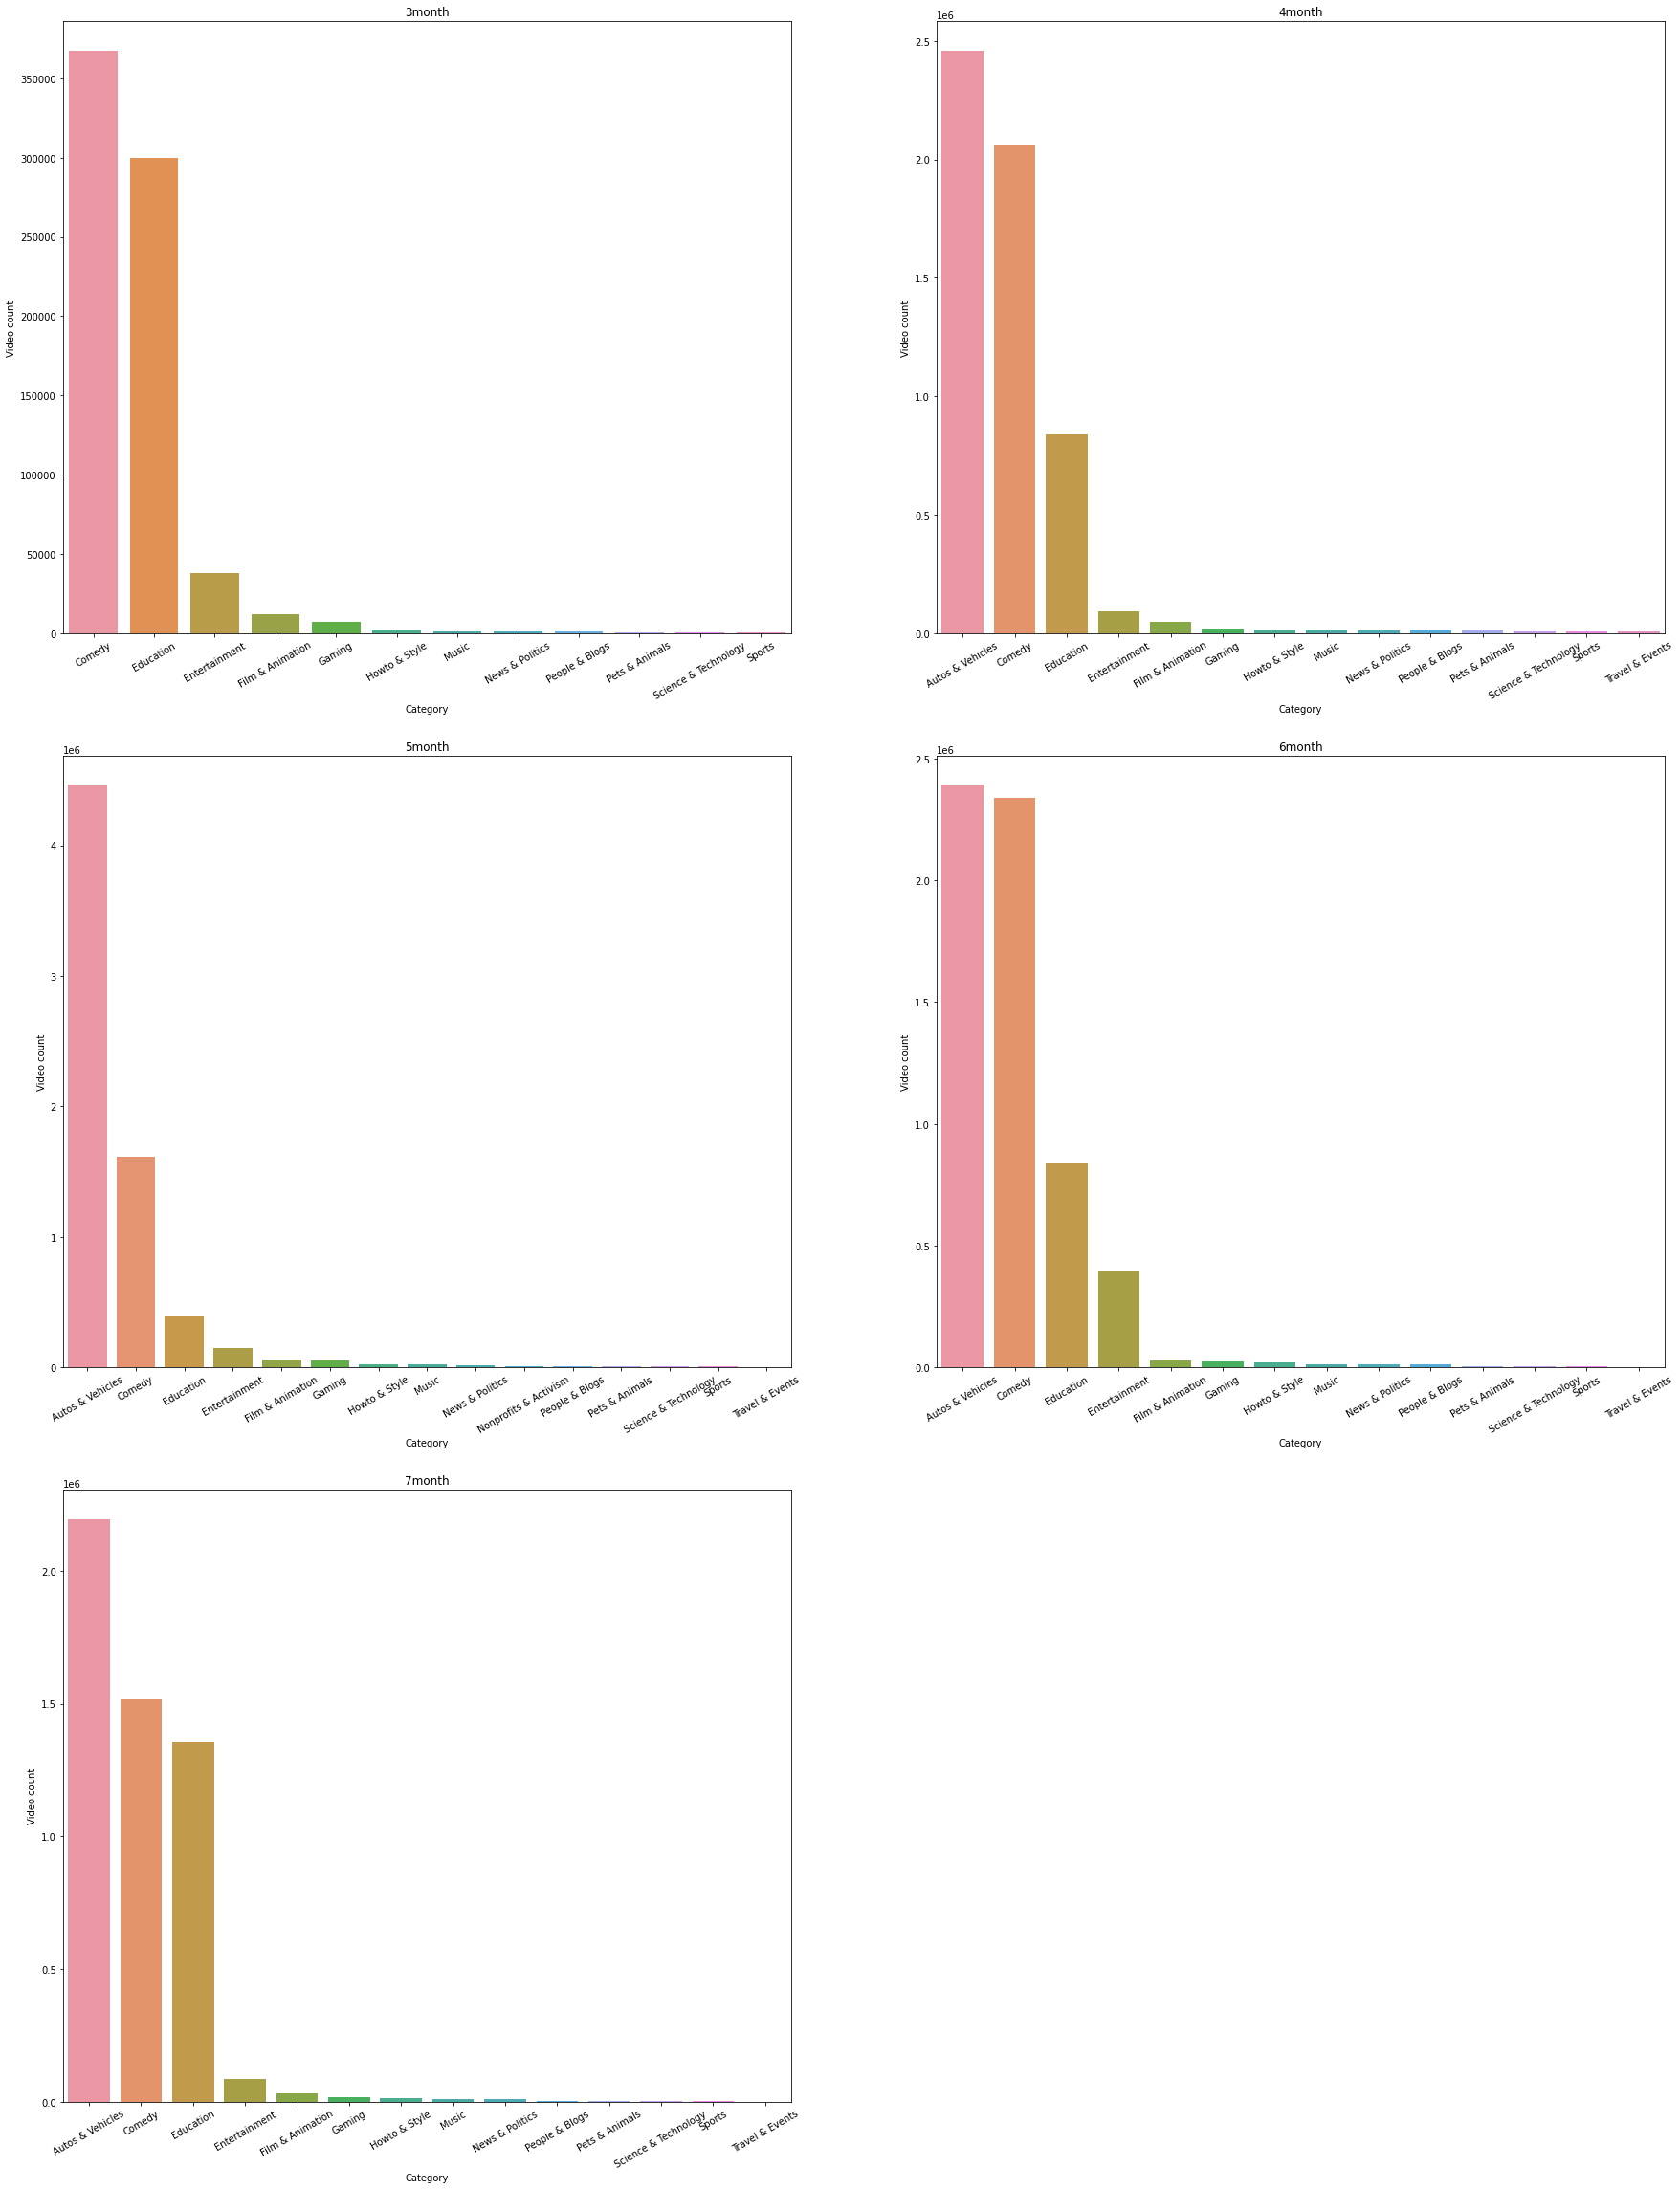

In [48]:
# 월별 카테고리 비디오 개수 
fig = plt.figure(figsize=(30,40))

for i in range(1, 6):
    plt.subplot(3, 2, i) 
    sns.barplot(x=df[df['month']==i+2].groupby('category_name')['on_channel_total_videos'].sum().index, y=df[df['month']==i+2].groupby('category_name')['on_channel_total_videos'].sum().sort_values(ascending=False))
    plt.title(str(i+2)+"month")
    plt.xticks(rotation=30)
    plt.xlabel("Category")
    plt.ylabel("Video count")

plt.show()

In [49]:
# 월별 > 카테고리별 > 채널별 > 비디오개수
df.groupby(["month", "category_name","channel_id"])["on_channel_total_videos"].sum()

month  category_name    channel_id
3      Comedy           CHEUL40          281
                        CHV3i3l          310
                        CHgBLs7          138
                        CHyCL5k          436
       Education        CH5YHB-          402
                                       ...  
7      Sports           CHpjOmw         7339
                        CHqsKWT         2738
                        CHtm_Qo       159362
                        CHunsfa           69
       Travel & Events  CHlRNDV          922
Name: on_channel_total_videos, Length: 1680, dtype: int64

# 월별 Top10 채널 (분류기준 비디오 개수)

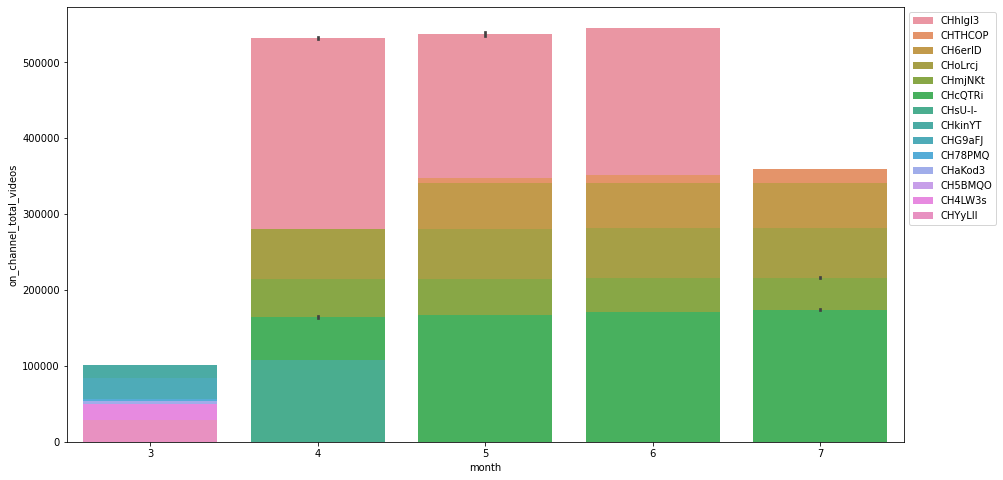

In [50]:

top10 = df.sort_values(by='on_channel_total_videos', ascending=False).groupby('month').head(10)

fig = plt.figure(figsize=(15,8))
sns.barplot(x='month',y='on_channel_total_videos', data=top10, dodge=False, hue='channel_id')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()

# 주별 Top5 채널 (분류기준 비디오 개수)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


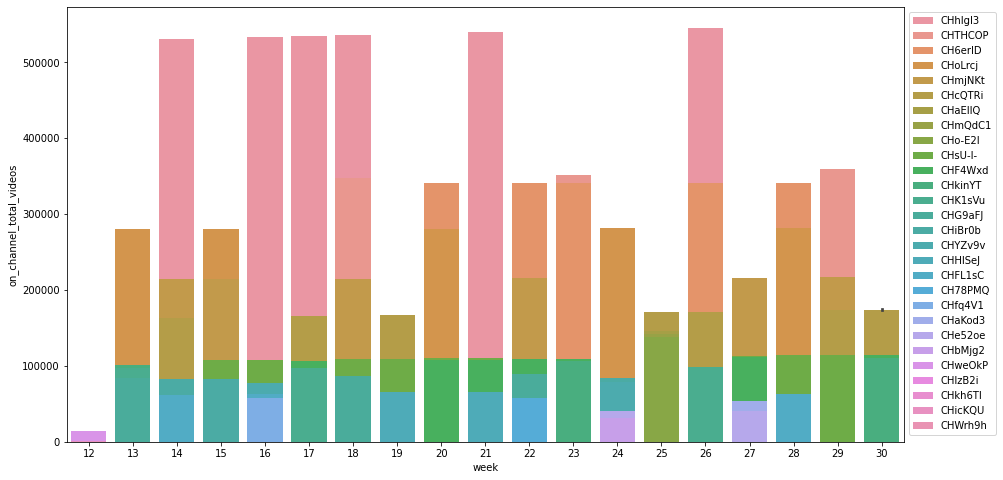

In [51]:

df['week'] = df['published_date'].dt.week # 주별로 나누기 
top5 = df.sort_values(by='on_channel_total_videos', ascending=False).groupby('week').head(5) #비디오개수 기준으로 top5

fig = plt.figure(figsize=(15,8))
sns.barplot(x='week',y='on_channel_total_videos', data=top5, dodge=False, hue='channel_id')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()

# 월별 카테고리별 태그 키워드 순위

<h2> 월별 태그 키워드 순위


In [52]:

df_tag = df.dropna() # tag 결측치 드랍 
grp_month_tag = df_tag.groupby(['month'])['tags'].apply(lambda x: ','.join(x)).reset_index() # 월별 태그 값 join
tags = grp_month_tag['tags'].apply(lambda x: x.split('|')) # 단어들로 나눔 

count_list = []
# 각 월별 단어 빈도수 count 
from collections import Counter
for tag in tags:
    counter = Counter(tag)
    count_list.append(counter)
    print(counter)


Counter({'몰카': 5, '웃긴영상': 4, '먹방': 4, 'eng': 4, 'idol': 4, '아이유': 3, '특수부대': 3, '특전사': 3, '밀리터리': 3, '박수홍': 3, '가족': 3, '김종국': 3, '유재석': 3, 'runningman': 3, 'SBS': 3, '뉴스': 3, 'Korean': 3, '예능': 3, '韓流': 3, 'kpop': 3, '꿀잼': 3, '아이돌': 3, '라일락': 2, 'IU': 2, '육군특수전사령부': 2, 'UDT해군특수전전단': 2, 'UDT': 2, '제707특수임무단': 2, '707': 2, '대테러 부대': 2, '해병대': 2, '해병대수색대': 2, 'SSU해난구조전대': 2, 'SSU': 2, 'SDT군사경찰특임대': 2, 'SDT': 2, '군대예능': 2, '오종혁': 2, '박군': 2, '육준서': 2, '6dory': 2, '다홍이': 2, '이광수': 2, '지석진': 2, '하하': 2, '송지효': 2, '전소민': 2, '양세찬': 2, 'RunninMan': 2, 'sbs': 2, 'Kim Jong Kook': 2, 'Lee Kwang Soo': 2, 'Ji Seok Jin': 2, 'Yoo Jae Suk': 2, 'Song Ji Hyo': 2, 'Haha': 2, 'Gary': 2, 'Yang Se Chan': 2, 'Jeon So Min': 2, '신규진': 2, '김보성': 2, '의리': 2, '뒷머리': 2, '#몰카': 2, '#미녀': 2, '이슈': 2, '친형': 2, '형': 2, '소속사': 2, '유퀴즈': 2, '유퀴즈온더블럭': 2, '정이수': 2, '경희대구너': 2, '경희대 구너': 2, '슛포러브': 2, '이스타': 2, '임형철': 2, '아다테타': 2, '연애배치고사': 2, '박종윤': 2, '이수타': 2, 'mukbang': 2, 'kbsworld': 2, 'kbs world': 2, '放送': 2, '韩国综

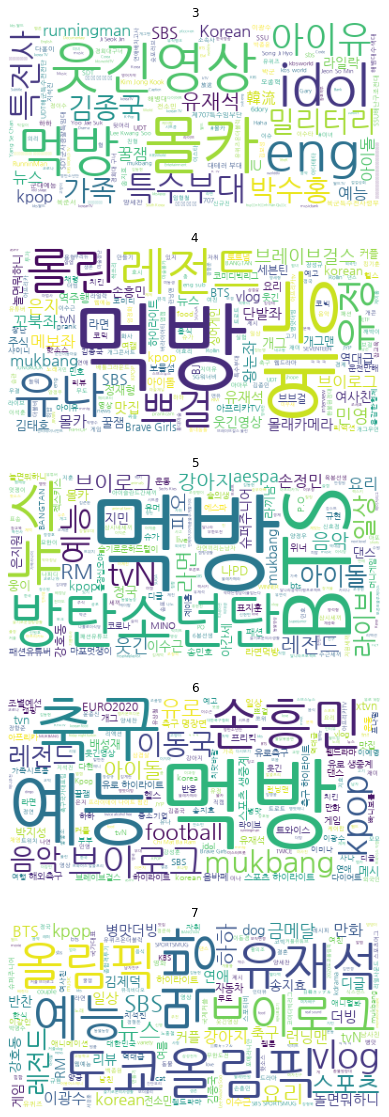

In [76]:

# wordcloud로 단어 시각화 

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

fig = plt.figure(figsize=(20,20))
rows = 5
cols = 1

wc1 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(count_list[0])
wc2 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(count_list[1])
wc3 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(count_list[2])
wc4 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(count_list[3])
wc5 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(count_list[4])

wc_list = [wc1, wc2, wc3 ,wc4, wc5]

i = 1
for wc in wc_list:
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(wc)
    ax.set_title(i+2)
    ax.axis("off")
    i += 1

# font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
# plt.rc('font', family=font_name)
# fm._rebuild()
plt.show()

<h2> 카테고리별 태그 키워드 순위

In [54]:

grp_cat_tag = df_tag.groupby(['category_name'])['tags'].apply(lambda x: ','.join(x)).reset_index() # 카테고리별 태그 값 join
cat_tags = grp_cat_tag['tags'].apply(lambda x: x.split('|')) # 단어들로 나눔 
cat_name = df['category_name'].sort_values().unique()

cat_list = []
# 각 카테고리별 단어 빈도수 count 
for tag in cat_tags:
    counter = Counter(tag)
    cat_list.append(counter)
    print(counter)


Counter({'자동차': 11, '시승기': 7, '블랙박스': 6, '몇대몇': 5, '사고': 5, '블박': 5, '블랙박스로 본 세상': 5, 'K8': 5, '기아': 5, '과실비율': 4, '맨인블랙박스': 4, '그랜저': 4, 'car': 3, '도로': 3, '모닝와이드': 3, 'SBS': 3, '차': 3, '국산차': 3, '수입차': 3, '현대차': 3, '솔님': 3, '비피디': 3, '기아자동차': 3, '한문철': 2, '교통사고': 2, '영상': 2, '블박세': 2, '스스로닷컴': 2, 'susulaw': 2, 'traffic': 2, 'accident': 2, 'traffic accident': 2, 'black box': 2, 'dash cam': 2, '자동차리뷰': 2, '운전': 2, '초보운전': 2, '추돌': 2, 'HyundaiWorldwide': 2, 'Car': 2, 'mocar': 2, '모카': 2, '리뷰': 2, '현대': 2, '기아K8': 2, '벤츠튜닝': 2, '중고차관리': 2, '수입차정비': 2, '벤츠 가솔린': 2, '수입차수리': 2, 'K7': 2, 'kia': 2, '현대자동차': 2, '기아차': 2, '경찰': 2, '블랙박스로본세상@모닝와이드': 2, 'sbs': 2, '변호사': 2, '고속도로': 2, '급차로변경': 2, 'SUV': 2, 'video,자동차꿀팁': 1, '꿀팁': 1, '썬팅': 1, '방어운전': 1, '안전운전': 1, '엔진오일,스마트폰': 1, '전자파': 1, '전자파차단': 1, '휴대폰': 1, '핸드폰': 1, '휴대전화': 1, '1분미만': 1, '유사과학,#중고차': 1, '#모하비': 1, '#차박': 1, '#캠핑': 1, '#전액할부,Dash Cam': 1, 'DashCam': 1, 'Driving Fails': 1, 'driving': 1, '맨인블박': 1, 'sbs 맨인블랙박스': 1, '차로': 1, '변경'

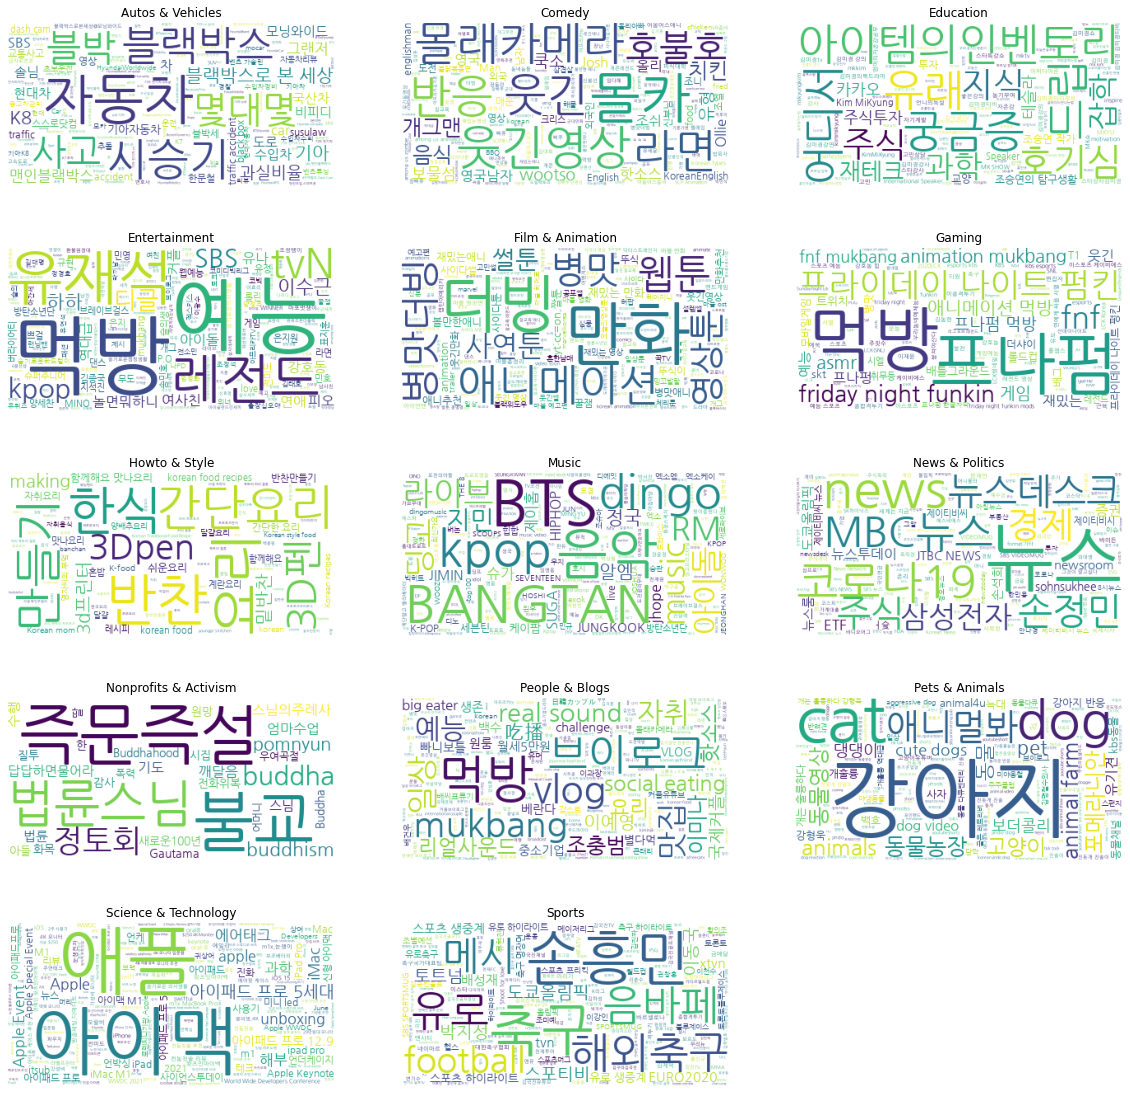

In [55]:
fig = plt.figure(figsize=(20,20))
rows = 5
cols = 3

wc1 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(cat_list[0])
wc2 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(cat_list[1])
wc3 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(cat_list[2])
wc4 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(cat_list[3])
wc5 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(cat_list[4])
wc6 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(cat_list[5])
wc7 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(cat_list[6])
wc8 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(cat_list[7])
wc9 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(cat_list[8])
wc10 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(cat_list[9])
wc11 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(cat_list[10])
wc12 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(cat_list[11])
wc13 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(cat_list[12])
wc14 = WordCloud(background_color='white', font_path=FONT_PATH).generate_from_frequencies(cat_list[13])

wc_list = [wc1, wc2, wc3,wc4,wc5,wc6,wc7,wc8,wc9,wc10,wc11,wc12,wc13,wc14]

i = 1
for wc in wc_list:
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(wc)
    ax.set_title(cat_name[i-1])
    ax.axis("off")
    i += 1
 
plt.show()

# Q2. 각각의 비디오는 시청자의 호응도를 판단할 수 있는 객관적인 지표들이 있음 

ex) views, likes, dislikes, comments...


- 비디오를 인기 동영상 기준에 부합하도록 분류할 수 있는 새로운 지표를 개발하고 
- 이 지표를 사용하여 engagement와 어떤 상관관계가 있는지 설명하시오. 

![youtube](https://user-images.githubusercontent.com/83392231/155834393-c4641dde-29ac-4f52-9674-9792043eb768.png)


여러 지표들에 관해 간단하게 탐색부터 시작해보자. 

In [56]:
# 분석에 앞서 데이터 프레임 카피를 해준다. 
df_copy = df.copy()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print(len(df_copy),'개의  데이터')
df_copy.describe() # describe로 데이터 훑어보기 

2644 개의  데이터


,on_rank,off_rank,on_views,off_views,on_likes,off_likes,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos,month,week
count,2644.000,2644.000,2644.000,2644.000,2644.000,2644.000,2644.000,2644.000,2644.000,2644.000,2644.000,2644.000,2644.000,2644.000,2644.000,2644.000,2644.000,2644.000
mean,20.234,35.795,953481.912,1432732.441,54658.126,68453.837,534.280,860.402,9032.085,11112.025,1742059.084,1748094.531,863952463.671,866546907.901,9276.285,9229.747,5.378,21.091
std,12.833,10.377,3200374.580,6836354.131,323933.712,498321.676,2070.643,4754.238,115532.131,157460.092,5546693.713,5569828.632,2511739979.704,2518025695.878,43156.370,43100.804,1.164,5.052
min,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,55316.000,55316.000,1.000,1.000,3.000,12.000
25%,9.000,28.000,235352.000,306854.000,4208.500,4932.750,86.000,108.000,511.000,597.750,148000.000,150750.000,36982278.750,37806606.250,118.000,118.000,4.000,17.000
50%,19.000,37.000,427924.500,571508.000,7851.000,9507.000,159.000,211.000,1157.000,1311.500,467000.000,469500.000,121535481.500,122383829.500,326.500,327.500,5.000,21.000
75%,30.000,45.000,826880.000,1119498.750,16883.500,20859.500,315.000,435.000,2720.000,3150.750,1272500.000,1282500.000,485738584.000,487879868.000,1245.250,1244.500,6.000,25.000
max,50.000,50.000,97276666.000,248876265.000,8097173.000,15759925.000,37349.000,133721.000,4625133.000,6659938.000,58900000.000,59400000.000,21701247997.000,21705683454.000,545577.000,545764.000,7.000,30.000


In [57]:
# 좋아요 댓글 구독자가 0인 경우도 존재한다. 
print(df_copy["on_likes"].value_counts().head(1))
print(df_copy["on_comments"].value_counts().head(1))
print(df_copy["on_channel_subscribers"].value_counts().head(1))

0    22
Name: on_likes, dtype: int64
0    17
Name: on_comments, dtype: int64
0    64
Name: on_channel_subscribers, dtype: int64


In [58]:
# 심지어 조회수 0인 데이터도 있다.(?)
df_copy[df_copy["on_views"]==0] 

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos,month,week
1855,VhAxq,CHdq61m,2021-04-21,Film & Animation,PT40S,NaN,This year’s annual Earth Day Doodle highlights...,2021-04-23,2021-04-24,24,...,0,0,1890000,1910000,363982789,407034643,80,80,4,16


In [59]:
# 조회수 top 10
# 전부 music 카테고리. 방탄소년단, NCT, 에스파, 엑소 등 아이돌 그룹 영상이 조회수가 압도적으로 많다. 
df_copy[["channel_id","description", "published_date", "category_name", "on_views", "on_likes", "on_dislikes", "on_comments", "on_channel_subscribers"]].sort_values(by = ["on_views"], ascending = [False]).head(10)

,channel_id,description,published_date,category_name,on_views,on_likes,on_dislikes,on_comments,on_channel_subscribers
1384,CH3IZKs,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,2021-05-21,Music,97276666,8097173,13899,4625133,55800000
603,CH3IZKs,BTS (방탄소년단) 'Permission to Dance' Official MVC...,2021-07-09,Music,62496315,6409443,17720,2125783,58900000
1138,CHEf_Bc,NCT DREAM's 1st album Hot Sauce is out!Listen ...,2021-05-10,Music,46629333,1780217,16466,474730,27200000
2617,CH3IZKs,BTS (방탄소년단) 'Film out' Official MVSong Credits...,2021-04-01,Music,35829903,4762803,23017,1632895,53100000
784,CHLkAep,Join the 🕺Permission to Dance💃 ChallengeHow to...,2021-07-23,Music,34744351,3471855,37327,47234,54700000
1087,CH3IZKs,BTS (방탄소년단) 'Butter' Official TeaserBTS (방탄소년단...,2021-05-18,Music,34439082,3750872,24065,1050306,54700000
220,CHEf_Bc,aespa's new single Next Level is out!Listen an...,2021-05-17,Music,33029974,1447202,37349,218154,27300000
135,CHEf_Bc,EXO's Special Album DON’T FIGHT THE FEELING is...,2021-06-07,Music,30069456,3356841,19971,2091078,27800000
1460,CH3IZKs,BTS (방탄소년단) 'Butter' Official MV (Hotter Remix...,2021-05-28,Music,27595572,4553750,22810,301367,56800000
1417,CHaO6TY,TWICE Alcohol-Free M/V TWICE The 10th Mini Alb...,2021-06-09,Music,26416805,2190938,32200,649113,20900000


In [60]:
# 조회수 하위 5
# 최소 조회수가 5만 이상은 되야 인기동영상에 오를 수 있는 것으로 보인다. 
df_copy[["channel_id","description", "published_date", "category_name", "on_views", "on_likes", "on_dislikes", "on_comments", "on_channel_subscribers"]].sort_values(by = ["on_views"], ascending = [False]).tail(5)

,channel_id,description,published_date,category_name,on_views,on_likes,on_dislikes,on_comments,on_channel_subscribers
2641,CHO4RG1,"애플 봄 스페셜 이벤트를 통해서 공개된 아이패드 프로 5세대, 신형 아이맥, 에어태...",2021-04-20,Science & Technology,59192,729,46,438,73100
207,CHhna8l,여덟번째 브희로그생일 축하해주신 모든 분들 너무 감사합니다앞으로도 겸손한 마음으로 ...,2021-06-12,People & Blogs,55563,5983,68,1048,139000
2570,CHRQ7Rw,브레이브걸스 인터뷰 기사에도 많은 관심 부탁드립니다. 감사합니다!https://ww...,2021-04-12,Music,53551,2118,9,477,1470
367,CH9gxOp,아프리카 최대시장 탐방기복잡하지만 잼있는고⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯...,2021-04-26,People & Blogs,53297,1877,30,345,85700
1855,CHdq61m,This year’s annual Earth Day Doodle highlights...,2021-04-21,Film & Animation,0,0,0,0,1890000


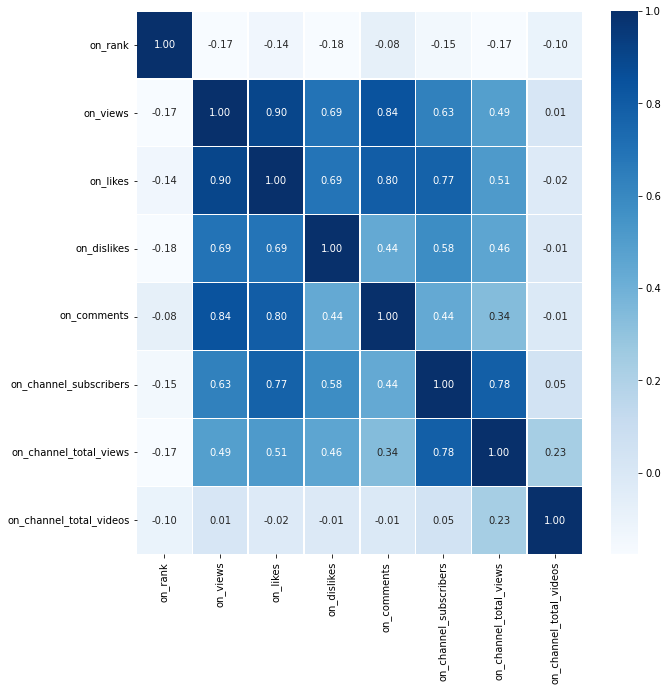

In [61]:
# 상관관계 히트맵 
plt.figure(figsize = (10,10))
column= ["on_rank","on_views","on_likes","on_dislikes","on_comments","on_channel_subscribers","on_channel_total_views","on_channel_total_videos"]
sns.heatmap(data = df_copy[column].corr(), annot = True, fmt = ".2f", linewidths = .5, cmap = "Blues");


조회수와 상관관계가 가장 높은 컬럼은 순서대로 좋아요, 댓글수, 싫어요, 구독자수이며 좋아요와 댓글수는 조회수와 연관이 크다고 나타나진다. 

채널의 총 조회수는 0.49정도의 수치를 보여줬다. 

채널의 총 비디오 수는 조회수와 큰 연관이 없었다. 

- 인기동영상에 랭크되었을 때 평균 조회수는 953,481회 이고, 평균 구독자 수는 약 170만명 이다. 

- 좋아요, 싫어요, 댓글 같은 경우 각 채널에서 표시 되지 않게 설정 할 수 있기 때문에, 그런 경우 0으로 수집되었다. 

- 조회수의 최소값이 0인 데이터가 있어서 찾아보니 조회수, 좋아요, 댓글 등 다 0이지만 구독자 수가 백만이 넘고 채널 토탈뷰는 3억이 넘었다. 위에 찾아본 인기동영상 기준처럼 외부요인이 영향을 준건지, 채널안에서 비교가 영향을 준건지 조금 애매한 데이터이다. 

- 조회수 상위 채널은 대부분 아이돌 그룹이다. 

- 좋아요, 댓글수, 싫어요, 구독자수 순으로 조회수와 연관이 깊다. 

그럼 분석한 내용을 바탕으로 몇 가지 컬럼을 더 추가해 분석해보자.

In [62]:

df_copy["likes/views"] = df_copy["on_likes"] / df_copy["on_views"]
df_copy["dislikes/views"] = df_copy["on_dislikes"] / df_copy["on_views"]
df_copy["comment/views"] = df_copy["on_comments"] / df_copy["on_views"]

df_copy['on_trending_date'] = pd.to_datetime(df_copy['on_trending_date'])
df_copy['off_trending_date'] = pd.to_datetime(df_copy['off_trending_date'])
df_copy['on_period'] = df_copy['on_trending_date']-df_copy['published_date']
df_copy['off_period'] = df_copy['off_trending_date']-df_copy['on_trending_date']
df_copy['off_period'] = df_copy['off_period'].astype(str).str[:1] # 앞글자만 자르기
df_copy['on_period'] = df_copy['on_period'].astype(str).str[:1] 
df_copy['on_period'] = df_copy['on_period'].astype(int) # 계산식 적용할 수 있게 int로 변경 
df_copy['off_period'] = df_copy['off_period'].astype(int) 

df_copy['views_increase'] = df_copy['off_views']-df_copy['on_views']
df_copy['views_increase_day'] = df_copy['views_increase'] / (df_copy['off_period'] + 1) # 당일 내려간 영상을 1로 침 
 
df_copy["tags_len"] = df_copy["tags"].str.split("|").str.len()


- likes/views, dislikes/views, comment/views : 조회수 대비 좋아요/싫어요/댓글수 비율

- on_period : 동영상 올린 후 인기동영상에 올라가게 된 기간 
- off_period : 인기동영상 게재 후 내려간 기간 
- views_increase_day : 게재된 기간 하루 동안 조회수 증가폭 
-tags_len : tag 개수 

총 일곱개의 새로운 지표를 추가 했다. 

In [63]:
# 새로 추가한 컬럼들 describe
df_copy[["likes/views", "dislikes/views", "comment/views","on_period", "off_period", "views_increase_day","tags_len"]].describe()

,likes/views,dislikes/views,comment/views,on_period,off_period,views_increase_day,tags_len
count,2643.000,2643.000,2643.000,2644.000,2644.000,2644.000,2274.000
mean,0.032,0.001,0.004,2.064,1.330,123965.719,21.118
std,0.040,0.001,0.006,0.490,1.170,631111.815,18.998
min,0.000,0.000,0.000,1.000,0.000,0.000,1.000
25%,0.012,0.000,0.002,2.000,0.000,0.000,8.000
50%,0.019,0.000,0.003,2.000,1.000,40919.000,15.000
75%,0.032,0.001,0.005,2.000,2.000,96402.833,28.000
max,0.328,0.021,0.097,6.000,7.000,18949949.875,132.000


- 조회수 대비 좋아요는 평균 3.2프로 최대 32프로.

- 조회수 대비 싫어요는 대부분 0프로 최대 2프로.

- 조회수 대비 댓글수는 대부분 낮은편이지만 최대 9.7프로 인걸로 봐서 특이값이 있을 것으로 예상 된다. 

- 보통 게시된지 이틀 이내에 인기동영상에 올랐고, 최고 6일까지도 존재하지만 대부분 이틀 이내에 올라가는 것으로 확인된다.

- 보통 인기동영상에 하루 이내로 랭크 되어있고, 최장 7일 까지도 있을 수 있다. 

- 인기동영상에 랭크되면 약 12만 정도 조회수가 올라갔으며, 하위권에 존재하는 0은 랭크되자마자 내려온 경우로 보인다. 

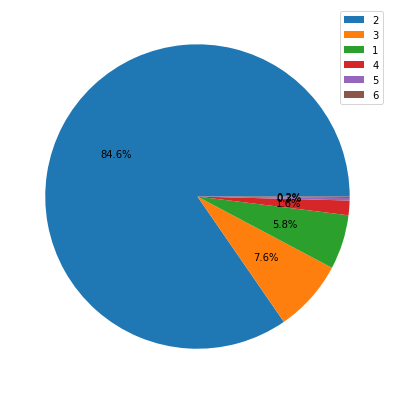

In [64]:
# 동영상 올린 후 인기동영상에 랭크된 기간 비율 
# 이틀째에 랭크된 경우가 84.6%로 거의 대부분 이고, 3일이 지나면 인기동영상에 올라갈 확률은 희박해진다. 
plt.figure(figsize = (7,7))
plt.pie(df_copy["on_period"].value_counts(), autopct='%.1f%%')
label = df_copy["on_period"].value_counts().index
plt.legend(label, loc="upper right")
plt.show()

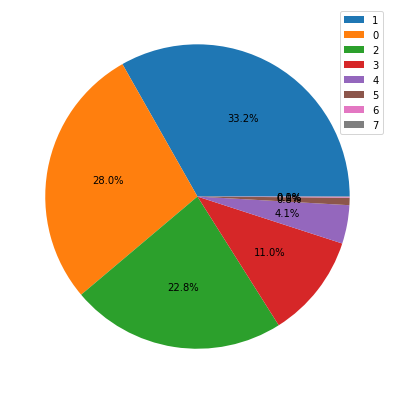

In [65]:
# 인기동영상에 게재된 기간 비율 
# 하루도 못가는 경우가 28%로 두번째이고, 보통 이틀 이내로 내려간다. 
plt.figure(figsize = (7,7))
plt.pie(df_copy["off_period"].value_counts(), autopct='%.1f%%')
label = df_copy["off_period"].value_counts().index
plt.legend(label, loc="upper right")
plt.show()

In [94]:
# 5일이상 걸려 인기동영상에 올라간 영상들 
# 최소 10만~최대 287만 정도 조회수가 나와야 시간이 오래 걸려도 인기동영상에 올라갈 수 있음
# 카테고리는 상위 조회수의 대부분이었던 music보다 entertainment 비율이 더 높음 
# 조회수가 비교적 낮은 10만 짜리 영상의 경우에는 좋아요, 댓글, 구독자 수가 확실히 많았다. 
df_copy[df_copy["on_period"]>4][["description","category_name","on_likes","on_comments","on_channel_subscribers","on_views"]].sort_values(by = ["on_views"], ascending = [False])

,description,category_name,on_likes,on_comments,on_channel_subscribers,on_views
2563,이런 상사면 주말에도 출근해야지..━━━━━━━━━━━━━━━━━━💖 [찐한쇼츠] ...,Entertainment,43037,1077,203000,2873289
17,밤바다와 찰떡✨ 로제의 〈Slow Dancing In A Burning Room〉♬...,Entertainment,241640,13572,63100,2706027
1682,"처음부터 잘 하는 사람은 없습니다. 유연성이 안 좋아서, 근력이 약해서, 나이가 많...",Sports,41903,1482,84600,2542033
1952,비행기에 절대 갖고 타면 안되는 금속이 있다고?#Shorts #갈륨,Education,26412,1596,175000,2199900
1207,#여신강림메이크업 #shorts #임주경메이크업렌즈협찬 : 하파크리스틴 시크리티브크...,People & Blogs,29952,1941,41000,1729099
1371,#송민호의파일럿 #그림2 #작품임수정인물퀴즈 사진 제공 : 연합뉴스네 가지 아이템 ...,Entertainment,26166,1954,3420000,873061
655,★★★More clips are available★★★iMBC http://ww...,Music,12908,1270,9380000,585612
688,[57회 백상예술대상]TV부문 대상 - 유재석,Entertainment,5631,1929,45200,299433
933,"바쁜 일상에 지친 당신에게 찾아올눈으로 보는 매거진, [당신의 일상을 밝히는가]▶S...",Entertainment,3470,232,121000,269834
1777,깻잎 두 묶음올리브유 한스푼소금 세꼬집Two bundles of perilla le...,People & Blogs,2809,70,2980,248716


In [99]:
# 5일 이상 인기동영상에 랭크되어있는 영상 리스트 
# 5일 이상인 비교적 긴 시간 인기동영상에 올라가있는 리스트로 총 24개중 조회수 순으로 10개를 뽑았다.
# 일단 시작순위가 전부 1위로 대부분 당시 화제성이 엄청 뛰어난 영상들 이었다.(BTS, 아이유, 당시 핫했던 뉴스나 유튜버들) 

df_copy[df_copy["off_period"]>4][["description","on_rank","off_rank","category_name","on_likes","on_comments","on_channel_subscribers","on_views"]].sort_values(by = ["on_views"], ascending = [False]).head(10)

,description,on_rank,off_rank,category_name,on_likes,on_comments,on_channel_subscribers,on_views
1384,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,1,35,Music,8097173,4625133,55800000,97276666
603,BTS (방탄소년단) 'Permission to Dance' Official MVC...,1,28,Music,6409443,2125783,58900000,62496315
2415,Connect with BTS: https://ibighit.com/bts http...,1,29,Music,2414549,121023,50500000,9661320
2432,"[MV] IU(아이유)_LILAC(라일락)K-POP Wonderland, 1theK...",1,34,Entertainment,825421,47712,22200000,8553414
1572,목격자 친구가 갑자기 물건 챙겨…손정민 옆에 다시 누웠다 (서울=연합뉴스) 한...,1,47,News & Politics,34896,14422,359000,5134545
1554,#머니게임 #머니게임5화 #진용진 출연자들에 대한 많은 비난이 쏟아져서댓글...,1,29,People & Blogs,67117,10171,2110000,4600715
540,애프터스쿨(After School) - '뱅(Bang)!' Full ver.#애프터...,1,30,Entertainment,155973,17532,1400000,3619163
2487,0:00 하루 끝02:05 금요일에 만나요03:09 너의 의미04:55 스물셋06:...,1,50,Music,269601,22681,2850000,3540343
777,국민 938002 00 677848 김건호https://toon.at/donate/...,1,50,People & Blogs,91976,28741,817000,3414658
1876,You were a kid once.ODG STUDIOwww.odg.kr,1,39,Entertainment,224962,16599,2280000,3284254


In [101]:
len(df_copy[df_copy["off_period"]>4][["description","on_rank","off_rank","category_name","on_likes","on_comments","on_channel_subscribers","on_views"]].sort_values(by = ["on_views"], ascending = [False]))

24

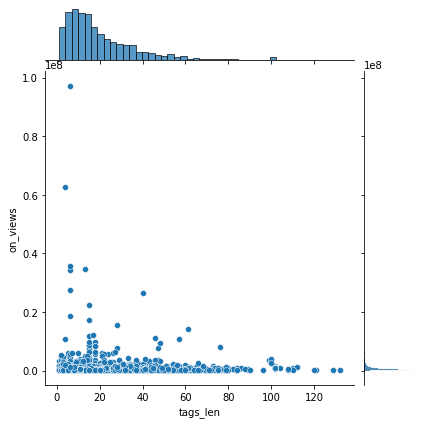

In [66]:
# 태그 개수와 조회수의 산점도
# 태그는 대부분 20개 이하로 달기 때문에 그 안에서 조회수가 높은 데이터가 몇몇 발견 되었다. 
sns.jointplot(data = df_copy, x="tags_len",y="on_views")
plt.show()

In [104]:
# 조회수 대비 좋아요 비율 상위 5
# 그룹 엑소 멤버들이 상위권을 차지하고 있다. 
df_copy[["channel_id","description", "category_name","on_rank","off_rank", "on_views", "on_likes", "on_dislikes", "on_comments","on_period", "off_period", "views_increase_day","likes/views"]].sort_values(by = ["likes/views"], ascending = [False]).head(3)

,channel_id,description,category_name,on_rank,off_rank,on_views,on_likes,on_dislikes,on_comments,on_period,off_period,views_increase_day,likes/views
358,CHUyr50,안녕하세요 백현입니다! 사랑하는 구독자 여러분 5.6일 훈련소에 들어가게 되었습니다...,People & Blogs,18,18,518808,170108,170,23363,2,0,0.000,0.328
1919,CHzCedB,D.O.'s 1st Mini Album 공감 will be released on J...,Music,20,34,771408,245800,293,31448,2,1,65552.500,0.319
653,CHzCedB,D.O.'s 1st Mini Album 공감 will be released on J...,Music,21,21,605001,186484,151,14719,2,0,0.000,0.308


In [105]:
# 조회수 대비 싫어요 비율 상위 3
# 영상들을 찾아보니 싫어요 상위권 답게 대부분 어그로(?)성 영상이 많았다. 
df_copy[["channel_id","description", "category_name","on_rank","off_rank", "on_views", "on_likes", "on_dislikes", "on_comments", "dislikes/views","on_period", "off_period", "views_increase_day"]].sort_values(by = ["dislikes/views"], ascending = [False]).head(3)

,channel_id,description,category_name,on_rank,off_rank,on_views,on_likes,on_dislikes,on_comments,dislikes/views,on_period,off_period,views_increase_day
84,CHeudxd,안녕하세요 오메킴입니다제가 이번 영상을 올리는 이유는 5월 9일경 있었던 큰 잘못 ...,Gaming,6,49,384865,1024,8160,5175,0.021,2,3,66382.000
250,CH-swYD,전기야 나와서보자 ^^리뷰 영상 출처https://youtu.be/53nbU26EgB8,People & Blogs,3,49,1287367,3415,26335,13992,0.020,3,4,185432.000
2639,CH69uMh,BJ봉준입니다 저는 2021년 5월 10일 새벽 1시경 동료BJ들과 방송을 진행하던...,Comedy,2,28,1137805,3333,22830,19228,0.020,2,3,206955.250


In [106]:
# 조회수 대비 댓글 비율 상위 3
# 댓글의 특이값은 댓글 추첨을 통해 선물을 주는 이벤트가 있는 경우였다.  
df_copy[["channel_id","description", "category_name", "on_rank","off_rank", "on_views", "on_likes", "on_dislikes", "on_comments", "comment/views","on_period", "off_period", "views_increase_day"]].sort_values(by = ["comment/views"], ascending = [False]).head(3)

,channel_id,description,category_name,on_rank,off_rank,on_views,on_likes,on_dislikes,on_comments,comment/views,on_period,off_period,views_increase_day
1653,CH2KmG_,무 정체성 무 컨텐츠 채널인데도 구독해주셔서 감사합니다선물 관련하여 추후 회사컨펌을...,Music,7,19,98823,7401,11,9608,0.097,1,1,49040.500
135,CHEf_Bc,EXO's Special Album DON’T FIGHT THE FEELING is...,Music,11,34,30069456,3356841,19971,2091078,0.070,2,2,4273181.000
1649,CH2KmG_,죄송합니다 앞으로 안 까불겠습니다그래도 즐거웠습니다영상 편집 : 바빠서 근 한달만에...,Music,41,41,71496,5672,27,4115,0.058,2,0,0.000


In [108]:
# 조회수 증가 상위 10
# 조회수 상위권답게 대부분 아이돌 그룹이며 특히 BTS의 당시 신곡은 게재 기간도 일주일로 최고치 였다. 
df_copy[["channel_id","description", "category_name","on_rank","off_rank", "on_views", "on_likes", "on_dislikes", "on_comments","on_period", "off_period", "views_increase_day"]].sort_values(by = ["views_increase_day"], ascending = [False]).head(10)

,channel_id,description,category_name,on_rank,off_rank,on_views,on_likes,on_dislikes,on_comments,on_period,off_period,views_increase_day
1384,CH3IZKs,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,Music,1,35,97276666,8097173,13899,4625133,1,7,18949949.875
603,CH3IZKs,BTS (방탄소년단) 'Permission to Dance' Official MVC...,Music,1,28,62496315,6409443,17720,2125783,1,6,12937656.714
1566,CHaO6TY,ITZY 마.피.아. In the morning M/Vhttps://orcd.co/...,Music,2,19,11185695,1476092,17512,166847,1,3,11335215.500
1417,CHaO6TY,TWICE Alcohol-Free M/V TWICE The 10th Mini Alb...,Music,1,43,26416805,2190938,32200,649113,2,4,9377917.000
220,CHEf_Bc,aespa's new single Next Level is out!Listen an...,Music,1,28,33029974,1447202,37349,218154,2,3,6536013.750
1155,CHEf_Bc,NCT DREAM's 1st Album Repackage Hello Future i...,Music,5,24,13319546,1262135,5226,248198,2,2,5966474.000
1087,CH3IZKs,BTS (방탄소년단) 'Butter' Official TeaserBTS (방탄소년단...,Music,3,15,34439082,3750872,24065,1050306,2,3,5731408.500
2617,CH3IZKs,BTS (방탄소년단) 'Film out' Official MVSong Credits...,Music,3,33,35829903,4762803,23017,1632895,2,3,5343625.500
1138,CHEf_Bc,NCT DREAM's 1st album Hot Sauce is out!Listen ...,Music,4,13,46629333,1780217,16466,474730,2,2,5196969.333
784,CHLkAep,Join the 🕺Permission to Dance💃 ChallengeHow to...,Music,3,15,34744351,3471855,37327,47234,2,3,5022095.750


In [109]:
# 조회수 증가 하위권 
df_copy[["channel_id","description", "category_name","on_rank","off_rank", "on_views", "on_likes", "on_dislikes", "on_comments","on_period", "off_period", "views_increase_day"]].sort_values(by = ["views_increase_day"], ascending = [True]).head(10)

,channel_id,description,category_name,on_rank,off_rank,on_views,on_likes,on_dislikes,on_comments,on_period,off_period,views_increase_day
2643,CHuhAUM,[MV] 마마무 (MAMAMOO) - Where Are We NowInstagram...,Music,26,26,3219809,399046,1861,57460,2,0,0.000
1042,CHrSase,술취한 여자친구 흑역사 생성 3탄 멤버십 회원들만을 위한 특별한 혜택을 누려보세용!...,Entertainment,39,39,465775,17141,180,1871,2,0,0.000
1046,CHyn7ao,#이보은​​​​​​​​​​​​​​​​​​​​​ #깻잎장아찌 #집밥레시피이보은의 요리...,Howto & Style,21,21,124928,3795,93,127,2,0,0.000
1050,CHmzMtX,ㅋㅋㅋㅋㅋㅋ역대급 결과웃소의 다양한 굿즈는!? 웃소샵 ▶ http://wootsos...,Comedy,42,42,427241,8773,329,2167,2,0,0.000
1052,CHB9e3p,케이팝 “찐”라이브 ‘잇츠라이브’이전에 없던 엄청난 스케일의 라이브 웹콘텐츠가 찾아...,Entertainment,33,33,261343,10271,64,859,2,0,0.000
1054,CHoQIdt,"If you like this Video, Plz click LIKE and SUB...",Entertainment,24,24,190903,36316,257,4087,2,0,0.000
1055,CHzz58-,"2020 도쿄올림픽 취재-MBN 전남주 기자, 임채웅 기자대한체육회는 한국 선수촌 ...",News & Politics,27,27,537995,10306,130,1301,4,0,0.000
1057,CHA6KBB,#히밥#저녁식사#히밥먹방다시 보기 링크 ↓https://tv.naver.com/14...,People & Blogs,45,45,427289,7455,234,508,2,0,0.000
2347,CHMEbRp,스토킹하던 직장 동료를 흉기로 수차례 찌른 혐의로 20대 남성이 경찰에 붙잡혔습니다...,News & Politics,39,39,1743159,11872,446,6358,2,0,0.000
1061,CHnNNN_,#김고은 #박해수 #안소희 #이진욱 #추자현 #한지민 #한효주 (feat. #박보영...,Entertainment,34,34,120390,4218,15,398,2,0,0.000


In [125]:
# 조회수가 전혀 증가하지 않고 올라갔다 내려온 경우는 대부분 당일 올라갔다 금방 내려온 경우로 보인다. 

print(len(df_copy[df_copy["views_increase_day"]==0]))
print(len(df_copy[(df_copy["views_increase_day"]==0) & (df_copy["off_period"]==0)]))

740
739


In [130]:
#증가량 0인 영상을 좀더 살펴봤다.
#조회수나 좋아요가 부족하진 않은데 현재 나온 지표로는 어떤점 때문에 금방 랭크 아웃됐는지 파악하기 어려운것 같다. 

df_copy[(df_copy["views_increase_day"]==0) & (df_copy["off_period"]==0)][["on_rank","off_rank","on_views", "on_likes", "on_dislikes", "on_comments","views_increase_day"]].sort_values(by = ["on_views"], ascending = [False]).head(10)

,on_rank,off_rank,on_views,on_likes,on_dislikes,on_comments,views_increase_day
5,14,14,10638842,442766,1993,38182,0.000
267,41,41,9706443,52432,263,6659,0.000
1534,31,31,9205614,321317,3200,68849,0.000
2509,36,36,8036827,78727,878,8521,0.000
1961,24,24,6474905,206201,2457,13313,0.000
1561,34,34,6256882,1216334,4389,83966,0.000
1254,12,12,6195556,1293467,1953,37584,0.000
2329,25,25,6132077,622720,3007,55162,0.000
1069,29,29,5947821,116728,1901,17760,0.000
55,26,26,5521217,235946,5219,0,0.000


In [71]:
# 인기동영상 개수별 채널 
# 한개인 경우가 제일 많음 
df_copy.groupby("channel_id")["channel_id"].count().value_counts()

1     407
2     159
3     128
4      72
5      48
6      37
7      33
8      21
10     10
9       9
11      6
14      4
13      3
17      1
12      1
15      1
Name: channel_id, dtype: int64

In [72]:
# 인기 동영상 개수가 1개인 채널 카테고리 현황 
df_copy.groupby("channel_id").filter(lambda g: g["channel_id"].count() <= 1)["category_name"].value_counts()

Entertainment            103
People & Blogs            74
Music                     56
Gaming                    29
Sports                    27
News & Politics           21
Comedy                    18
Howto & Style             15
Film & Animation          14
Education                 14
Science & Technology      11
Pets & Animals            11
Autos & Vehicles          10
Travel & Events            3
Nonprofits & Activism      1
Name: category_name, dtype: int64

In [73]:
# 인기 동영상 개수가 2~3개인 채널 카테고리 현황 
# 한개인 카테고리와 1~3위 동일 
df_copy.groupby("channel_id").filter(lambda g: 1< g["channel_id"].count() < 4)["category_name"].value_counts().head(3)

Entertainment     252
People & Blogs    116
Music              61
Name: category_name, dtype: int64

In [74]:
# 인기 동영상 개수가 5개이상인 채널 카테고리 현황 
# 스포츠 카테고리가 비교적 다수의 동영상을 보유하고 있음을 알 수 있다. 
df_copy.groupby("channel_id").filter(lambda g: g["channel_id"].count() > 4)["category_name"].value_counts().head(3)

Entertainment     492
Sports            154
People & Blogs    138
Name: category_name, dtype: int64

 - 대부분의 채널이 3개이내의 인기동영상 보유하고 있었다. 

 - Entertainment, People & Blogs 는 꾸준히 많은 보유량을 보여주었고, Sports는 비교적 다수의 인기동영상을 보유한 카테고리임을 알 수 있었다. 

 - 조회수가 높은 카테고리는 거의 대부분 music임에 비해 인기동영상 보유 비중이 높은것은 Entertainment 이다. 

# 결론 

일단 인기동영상이 되는데 가장 큰 영향을 미치는 것은 조회수이며 평균 95만 정도, 최소 5만 이상의 조회수가 나와야 인기동영상에 랭크 될 수 있다.

조회수가 가장 상관관계가 높은 것은 좋아요 수치이며, 좋아요 > 댓글수 > 싫어요 > 구독자 순으로  조회수와 연관이 높고, 채널의 총 비디오수는 큰 연관이 없다. 

3일 이내에 인기동영상이 되지 않으면 가능성이 점점 떨어진다. 

랭크된 후 보통 이틀이내로 내려가며 당일 바로 내려가는 경우도 28%정도 있다. 

조회수 대비 좋아요 비율은 아이돌 그룹이 대부분이다. 

조회수 대비 싫어요 비율은 비호감적인 영상이 많았다. 

조회수 대비 댓글 비율의 경우에는 좋아요의 비율보단 낮으나, 댓글추첨을 통한 경품추첨이 걸려있을 경우 확실하게 높은 수치를 보여줬다. 

전반적으로 Entertainment, people & Blogs, music 카테고리 순으로 인기동영상 비중이 높았다.  그러나 차이가 많이 나는 높은 조회수 부분에서는 단연 아이돌 그룹이 앞섰다. 


---


<h3> 높은 Engagement를 얻기 위해선..

- 최소 5만 이상의 조회수를 얻을 만한 컨텐츠 제작 아이디어 필요. 

- 빠른 시일 내에 인기동영상에 오르지 못하면 기회가 없어지기 때문에 목적에 따라 경품이나 노이즈 마케팅으로 랭크 시킬 기회가 있을 것으로 예상됨. 

- 태그 개수는 조회수와 크게 상관이 없는 것으로 보이나, 대부분 20개 내외로 사용함.

- Entertainment, people & Blogs 카테고리가 유리함. music은 아이돌 위주여서 제외. 




